<a href="https://colab.research.google.com/github/Sanjanah8/BreakingBug-ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [31]:
# Load dataset
df = pd.read_csv("dataset.csv")

# Print the first 5 rows of the dataframe
print(df.head())

# Exploring the data type of each column
print(df.info())

# Checking the data shape
print(f"Data shape: {df.shape}")

# Id column
print(f"Id column min: {df['id'].min()}, max: {df['id'].max()}")

# Age column
print(f"Age column min: {df['age'].min()}, max: {df['age'].max()}")

# Summarize the age column
print(df['age'].describe())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [32]:
with open("dataset.csv", 'r') as f:
    first_line = f.readline()
    column_names = first_line.strip().split(',')
    print(column_names)

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


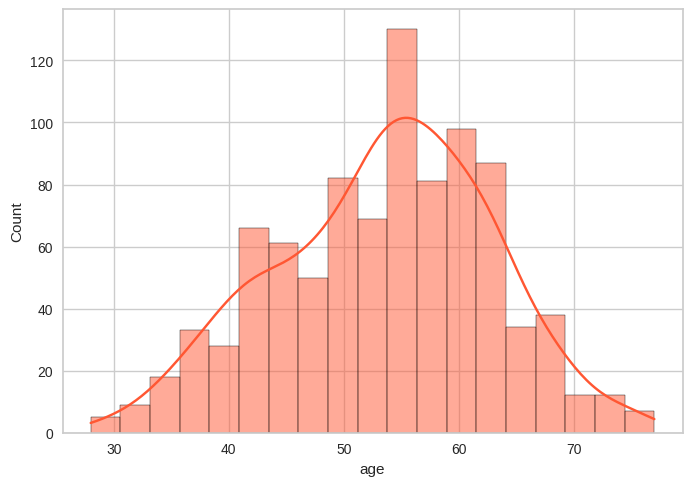

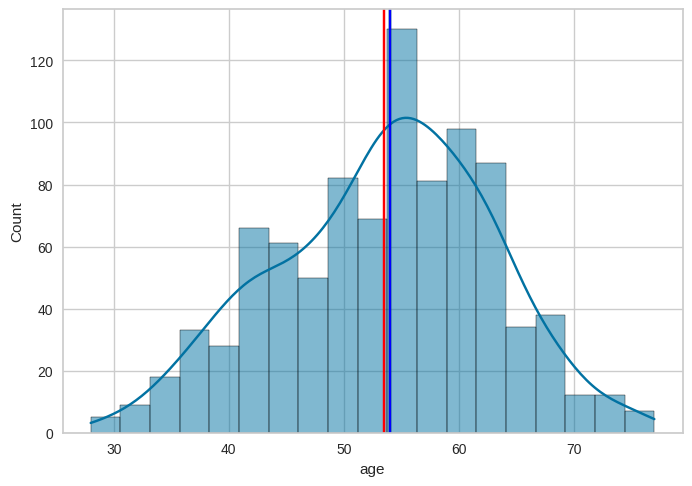

Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


In [33]:
# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)
plt.show()

# Plot the mean, median, and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color='Green')
plt.axvline(df['age'].mode()[0], color='Blue')
plt.show()

# Print the value of mean, median, and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

# Plot the histogram of age column using plotly and color it by sex
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [34]:
# Check the unique values in the 'sex' column to determine correct labels
print("Unique values in 'sex' column:", df['sex'].unique())

# Calculate the percentage of male and female value counts in the data
value_counts = df['sex'].value_counts()
male_count = value_counts.get('M', 0)
female_count = value_counts.get('F', 0)
total_count = male_count + female_count

# Calculate percentages
male_percentage = (male_count / total_count) * 100 if total_count > 0 else 0
female_percentage = (female_count / total_count) * 100 if total_count > 0 else 0

# Display the results
print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data: {female_percentage:.2f}%')

# Calculate the difference
if female_count > 0:
    difference_percentage = ((male_count - female_count) / female_count) * 100
    print(f'Males are {difference_percentage:.2f}% more than females in the data.')
else:
    print('No female data to compare.')

Unique values in 'sex' column: ['Male' 'Female']
Male percentage in the data: 0.00%
Female percentage in the data: 0.00%
No female data to compare.


In [12]:
# Find the value counts of the age column grouped by sex column
print(df.groupby('sex')['age'].value_counts())

# Find the unique values in the dataset column
print(df['dataset'].value_counts())

# Plot the countplot of the dataset column
fig = px.bar(df, x='dataset', color='sex')
fig.show()

# Print the values of the dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

# Make a plot of the age column using plotly and coloring by dataset
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


___________________________________________________________
Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64
___________________________________________________________
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


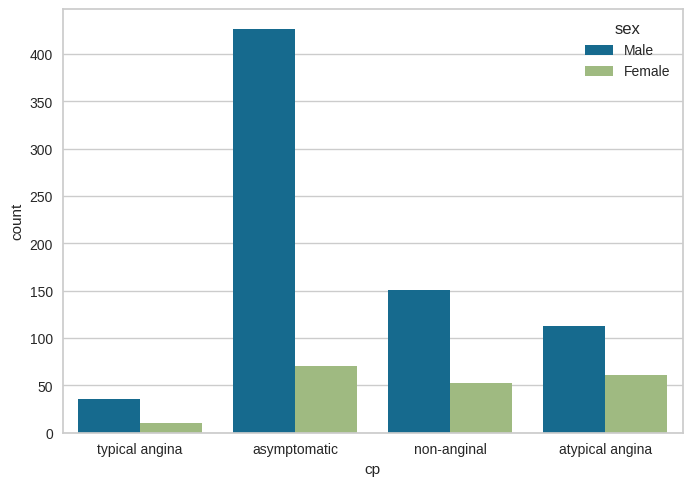

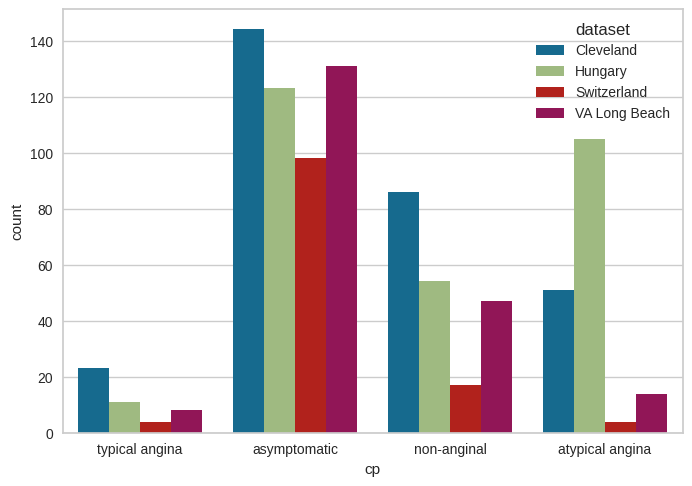

In [13]:
# Print the mean, median, and mode of age column grouped by dataset column
print("___________________________________________________________")
print("Mean of the dataset: ", df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print("Median of the dataset: ", df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print("Mode of the dataset: ", df.groupby('dataset')['age'].apply(lambda x: x.mode()[0]))
print("___________________________________________________________")

# Value count of the cp column
print(df['cp'].value_counts())

# Count plot of the cp column by sex column
sns.countplot(data=df, x='cp', hue='sex')
plt.show()

# Count plot of the cp column by dataset column
sns.countplot(data=df, x='cp', hue='dataset')
plt.show()

# Draw the plot of age column grouped by cp column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

In [14]:
# Summarize the trestbps column
print(df['trestbps'].describe())

# Dealing with missing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

# Impute the missing values of trestbps column using iterative imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)
df[['trestbps']] = imputer1.fit_transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

# Check which columns have missing values
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

# Impute missing values for other columns
imputer2 = IterativeImputer(max_iter=10, random_state=42)
for col in ['ca', 'oldpeak', 'chol', 'thalch']:
    df[[col]] = imputer2.fit_transform(df[[col]])

print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

df['thal'].value_counts()

# Remove rows with missing values in 'thal'
df = df.dropna(subset=['thal'])

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
Percentage of missing values in trestbps column: 6.41%
Missing values in trestbps column: 0
ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64
The missing values in thal column are: 486


In [16]:
# Find missing values
print(df.isnull().sum())

# Find categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f'Categorical Columns: {cat_cols}')

# Find numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
print(f'Numerical Columns: {num_cols}')

# Function to impute categorical missing data
def impute_categorical_missing_data(df, col):
    imputer = SimpleImputer(strategy='most_frequent')
    df[col] = imputer.fit_transform(df[[col]]).ravel() # Flatten the array
    return df

# Function to impute numerical missing data
def impute_numerical_missing_data(df, col):
    imputer = IterativeImputer(max_iter=10, random_state=42)
    df[[col]] = imputer.fit_transform(df[[col]])
    return df

# Impute missing values for categorical columns
for col in cat_cols:
    if df[col].isnull().any():
        df = impute_categorical_missing_data(df, col)

# Impute missing values for numerical columns
for col in num_cols:
    if df[col].isnull().any():
        df = impute_numerical_missing_data(df, col)

# Verify if there are any missing values left
print(df.isnull().sum())

id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         28
restecg      0
thalch       0
exang        2
oldpeak      0
slope       49
ca           0
thal         0
num          0
dtype: int64
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [24]:

if 'dataset' in df.columns and 'cp' in df.columns:
    df = pd.get_dummies(df, columns=['dataset', 'cp'], drop_first=True)

    # Check correlation
    corr = df.corr()
    print(corr)
    fig = plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()

    # Remove highly correlated features
    corr_threshold = 0.85
    to_drop = [column for column in corr.columns if any(abs(corr[column]) > corr_threshold) and column != 'target']
    df = df.drop(columns=to_drop)

In [27]:
# Print columns before creating dummies
print("Columns before get_dummies:", df.columns)

if 'dataset' in df.columns and 'cp' in df.columns:
    df = pd.get_dummies(df, columns=['dataset', 'cp'], drop_first=True)

    # Print columns after creating dummies
    print("Columns after get_dummies:", df.columns)

Columns before get_dummies: Index(['id', 'age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'sex_Male',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach'],
      dtype='object')


In [39]:
# Train-test split
X = df.drop('num', axis=1)
y = df['num']

# Identify and handle non-numerical columns
# For example, one-hot encode categorical features
X = pd.get_dummies(X)

# Impute missing values if any exist after one-hot encoding
imputer = SimpleImputer(strategy='most_frequent') # Or any other suitable strategy
X = imputer.fit_transform(X)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Define hyperparameter grids
param_grid = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10]},
    "KNN": {'n_neighbors': [3, 5, 7, 9]},
    "NB": {},  # No hyperparameters for Naive Bayes
    "SVM": {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30]},
    "Random Forest": {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]},
    "XGBoost": {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    "GradientBoosting": {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    "AdaBoost": {'n_estimators': [50, 100, 150]}
}

# Hyperparameter tuning function
def hyperparameter_tuning(X, y, models, param_grid):
    results = {}
    for name, model in models.items():
        grid_search = GridSearchCV(model, param_grid.get(name, {}), cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X, y)
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        results[name] = {
            'best_params': best_params,
            'accuracy': accuracy
        }
    return results

# Example usage
results = hyperparameter_tuning(X, y, models, param_grid)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

KeyboardInterrupt: 